In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv("spam.csv",encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5020,ham,:-( sad puppy noise,NaN,NaN,NaN
3864,ham,"THATåÕS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG...",NaN,NaN,NaN
4512,spam,Money i have won wining number 946 wot do i do...,NaN,NaN,NaN
3987,ham,Hello. Sort of out in town already. That . So ...,NaN,NaN,NaN
1665,ham,Dunno cos i was v late n when i reach they ins...,NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1346,ham,Is it ok if I stay the night here? Xavier has ...
1298,ham,Your daily text from me ÛÒ a favour this time
1692,ham,Weightloss! No more girl friends. Make loads o...
4596,ham,Full heat pa:-) i have applyed oil pa.
1365,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
#EDAs
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

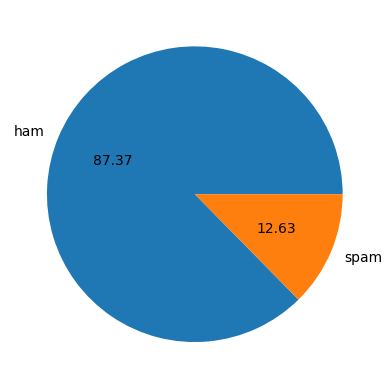

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#data imbalance
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\deend/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_char']=df['text'].apply(len) #number of characters

In [24]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham msg
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam msg
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

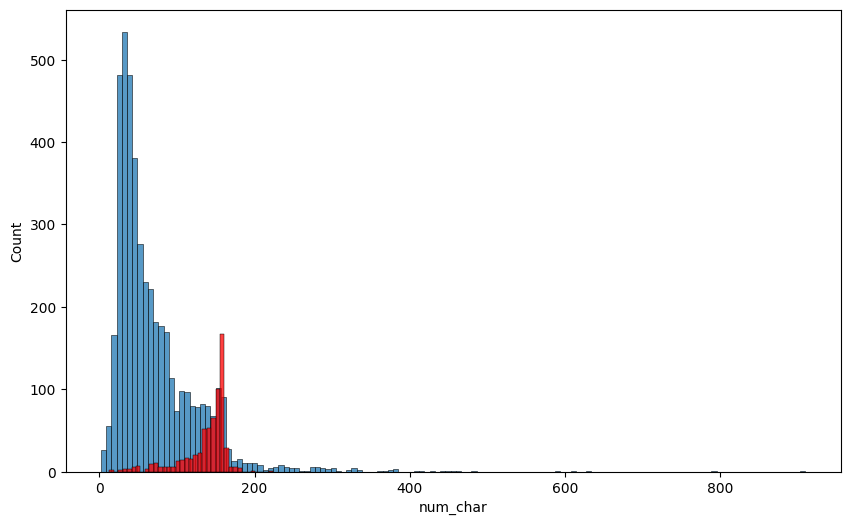

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

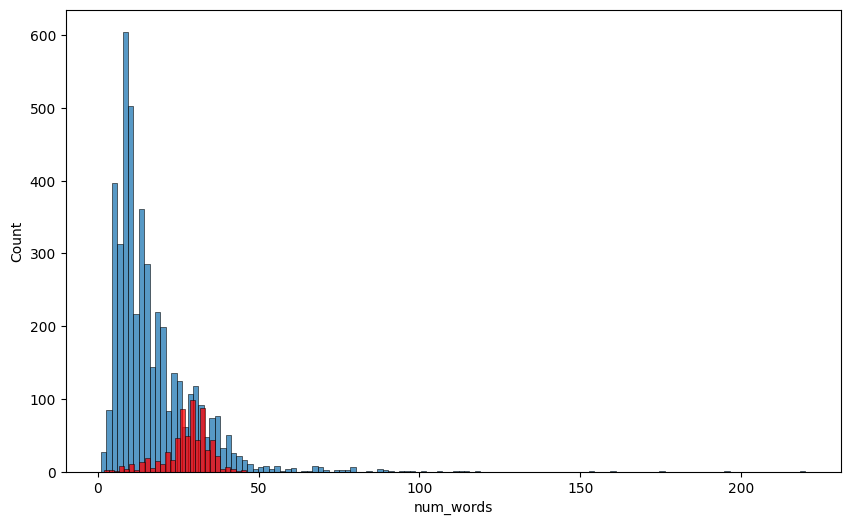

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

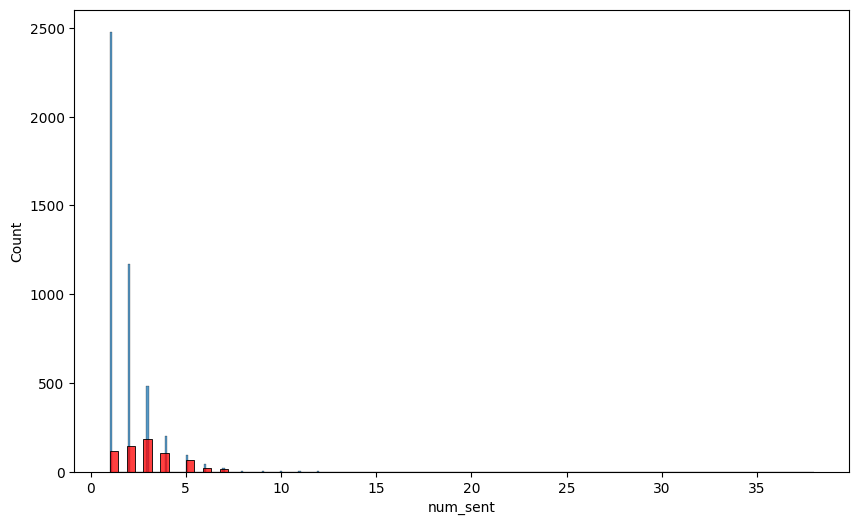

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

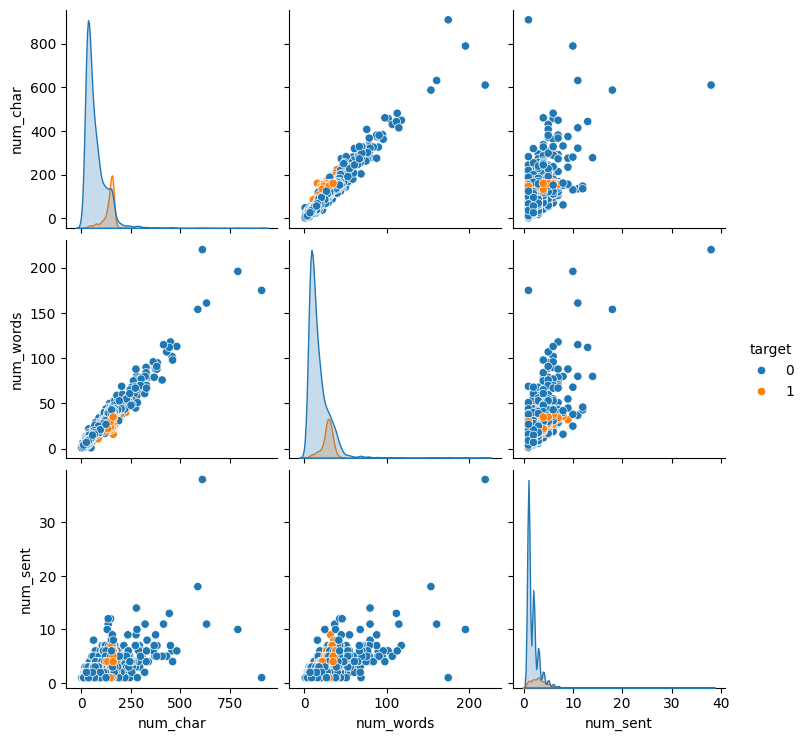

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

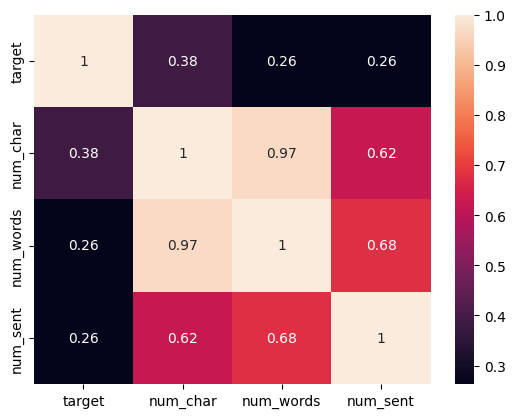

In [36]:
numeric_df = df.select_dtypes(include=['int32','int64', 'float64'])
sns.heatmap(numeric_df.corr(),annot=True)

In [37]:
print(df.dtypes)


target        int32
text         object
num_char      int64
num_words     int64
num_sent      int64
dtype: object


In [38]:
#we will keep numchar because num sent and word have very high correlation they will introduce multicollinearity 

In [39]:
#Data preprocessing
##data preproccessing -> lower , tokenisation , removing spcl char ,removing stop word and punctuation ,stemming

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [41]:
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import nltk
def transform_data(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[] 
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [43]:
from nltk.corpus import stopwords
import string

In [44]:
transform_data("HI how are you Ishika . I loved the lectures on machine learning??")

'hi ishika love lectur machin learn'

In [45]:
df['transform_text']=df['text'].apply(transform_data)

In [46]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from wordcloud import WordCloud

In [48]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_c=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

In [50]:
df.head()

,target,text,num_char,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


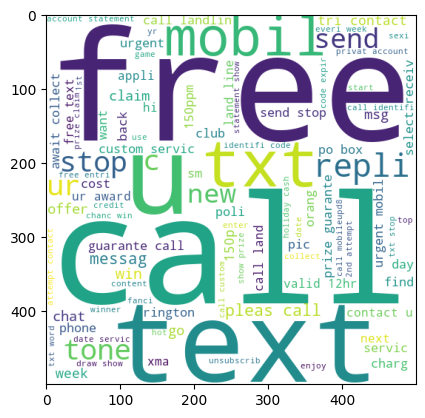

In [51]:
plt.imshow(spam_c)

In [52]:
ham_c=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

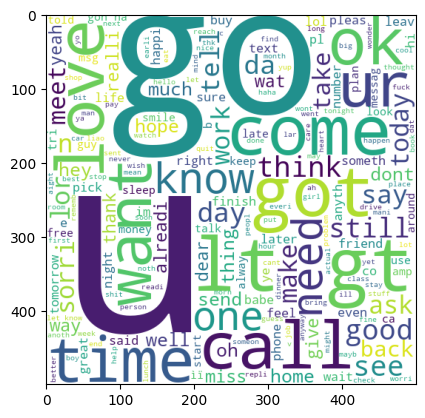

In [53]:
plt.imshow(ham_c)

In [54]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

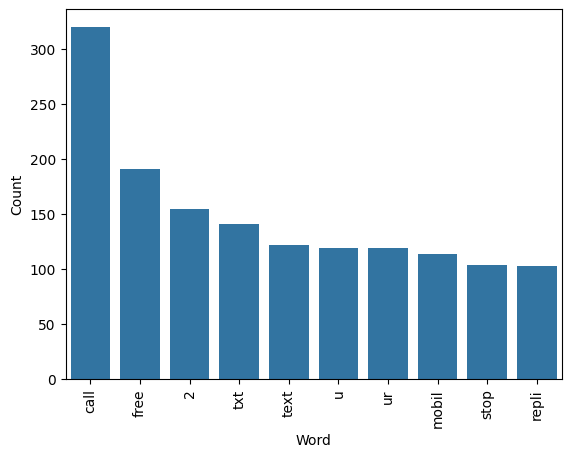

In [57]:
# Make sure spam_corpus is a list of words
most_common_words = Counter(spam_corpus).most_common(10)

# Build the whole DataFrame at once:
df_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Correct barplot syntax:
sns.barplot(x='Word', y='Count', data=df_common)

plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
most_ham=Counter(ham_corpus).most_common(10)

In [61]:
most_ham_df=pd.DataFrame(most_ham,columns=['word','count'])

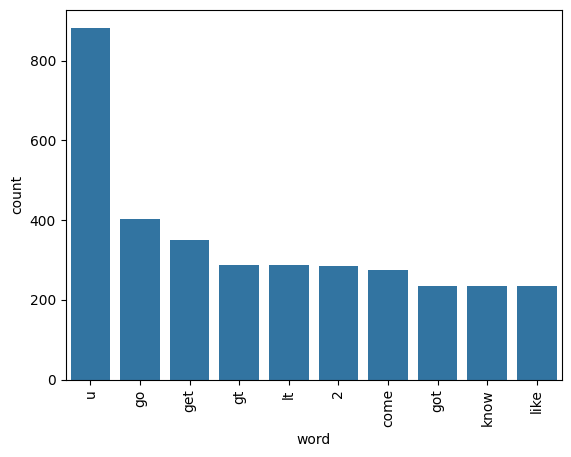

In [62]:
sns.barplot(x='word',y='count',data=most_ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
cv=CountVectorizer()
X=cv.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 6708)

In [66]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
print(X_train.shape)
print(y_train.shape)

(4135, 6708)
(4135,)


In [80]:
print(X_train.dtype)
print(y_train.dtype)


int64
int32


In [81]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [82]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [83]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [84]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))